<a href="https://colab.research.google.com/github/ArifQureshi3966/FireSmokeProject/blob/main/Fire_and_Smoke_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries


##Mounting and Unzipping Code 


##### Mounting Drive

In [ ]:
from functools import wraps
import time
def time_it(func):
    
    @wraps(func)
    def wrapper(*args, **kwargs):
        t1 = time.time()
        result =  func(*args, **kwargs)
        t2 = time.time()
        print(f"{t2-t1} sec(s) for function {func.__name__}")  
        return result
    return wrapper

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import time
t1 = time.time()
from google.colab import drive
drive.mount('/content/drive')
t2 = time.time()
print(f"{t2-t1} sec(s) for mounting")

#####unzipping code (optional)

In [ ]:
#!unzip /content/drive/My\ Drive/datasets/base_data.zip
t1 = time.time()
!unzip /content/drive/My\ Drive/datasets/cleaned_dataset.zip #basic trained dataset
t2 = time.time()
print(f"{t2-t1} sec(s) for unzipping")  

#Libraries Initialization

In [ ]:
from tensorflow.keras import Sequential, Model, regularizers
# Various Layers that can be part of the network
from tensorflow.keras.layers import (Conv2D, ZeroPadding2D, Activation, Input,
                                     SeparableConv2D, BatchNormalization,
                                     MaxPooling2D, AveragePooling2D, Lambda,
                                     Flatten, Dense,Dropout)

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import (ImageDataGenerator, 
                                                 img_to_array)
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import os
from PIL import Image
from tensorflow.keras.losses import BinaryCrossentropy
%matplotlib inline
import concurrent.futures as multi
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

#Get Data from various folder

### Initialization

In [ ]:
base = os.getcwd()

base_dataset = '/content/cleaned_dataset'
aqdas_test = '/content/drive/My Drive/datasets/newdataset'
test_pics = '/content/drive/My Drive/datasets/Test'
datasets = base_dataset

In [ ]:
### IMAGE SIZE AND BATCH SIZE CONTROLLER
######################################
#####################################
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
DEPTH = 3
shuffle = False
copy = False
class_names=["non_fire", "fire_smoke"]

###Copy Code

#### Copy Function

In [ ]:
import os
import shutil 
import concurrent.futures

def copy(src_class_folder,dst_class_folder,file_):
    print(os.path.join(src_class_folder,file_))
    shutil.copyfile(os.path.join(src_class_folder,file_),
                os.path.join(dst_class_folder,file_))
    return None

@time_it
def copy_data_classes(src, dst, classes):
    '''
    Args:
        src: source to be copied (string path)
        dst: directory to copy to (string path)
        classes: the classes in the src folder (list or iterable containing string)
    Returns:
        True is sucessful
    '''
    #First confirm that the dst is an existing directory
    result = False
    if not os.path.isdir(dst):
        os.mkdir(dst)
    for class_ in classes:
        if not os.path.isdir(os.path.join(dst,class_)):
            os.mkdir(os.path.join(dst,class_))
    #After directories are created the file transfer takes place
    for class_ in os.listdir(src):
      src_class_folder = os.path.join(src, class_)
      if class_.startswith(".") or not os.path.isdir(src_class_folder) or class_ \
       not in classes:
        continue
      else:
        dst_class_folder = os.path.join(dst, class_)
        #arg = ((src_class_folder, dst_class_folder,file_) for file_ in \
        #        os.listdir(src_class_folder))
        #for file_ in os.listdir(src_class_folder):
        #    copyfile(os.path.join(src_class_folder,file_),
        #        os.path.join(dst_class_folder,file_))
        with concurrent.futures.ThreadPoolExecutor() as e:
            for file_ in os.listdir(src_class_folder):
              e.submit(shutil.copy, os.path.join(src_class_folder,file_),
                       os.path.join(dst_class_folder,file_))
    result = True
    return result

@time_it
def move_data(src, dst):
    '''
    Args:
        src: source to be copied (string path)
        dst: directory to copy to (string path)
    Returns:
        True is if finished
    '''
    #First confirm that the dst is an existing directory
    result = False
    if not os.path.isdir(dst):
        os.mkdir(dst)
    #After directories are created the file transfer takes place
    with concurrent.futures.ThreadPoolExecutor() as e:
        for file_ in os.listdir(src):
          if os.path.isfile(os.path.join(src,file_)):
            e.submit(shutil.move, os.path.join(src,file_),
                  os.path.join(dst,file_))
    result = True
    return result

#### Copy data


In [ ]:
DST = datasets
#FIRE
# Buildings
SRC = '/content/drive/My Drive/datasets/new_training/fire_smoke/buildings fire'
class_names=[ "fire_smoke"]
print("Copying data ...",SRC,'to',DST)
copy_data_classes(SRC, DST, class_names)
print("Finished copying data")
#Forest
SRC = '/content/drive/My Drive/datasets/new_training/fire_smoke/forest fire'
class_names=[ "fire_smoke"]
print("Copying data ...",SRC,'to',DST)
copy_data_classes(SRC, DST, class_names)
print("Finished copying data")
#house
SRC = '/content/drive/My Drive/datasets/new_training/fire_smoke/house fire'
class_names=[ "fire_smoke"]
print("Copying data ...",SRC,'to',DST)
copy_data_classes(SRC, DST, class_names)
print("Finished copying data")
#australian fire
SRC = '/content/drive/My Drive/google-images-download/google_images_download\
/downloads/forest and wild fire'
class_names=[ "fire_smoke"]
print("Copying data ...",SRC,'to',DST)
copy_data_classes(SRC, DST, class_names)
print("Finished copying data")
#forest and wildfire
SRC = '/content/drive/My Drive/google-images-download/google_images_download\
/downloads/australian fire'
class_names=[ "fire_smoke"]
print("Copying data ...",SRC,'to',DST)
copy_data_classes(SRC, DST, class_names)
print("Finished copying data")
#NONE FIRE
#Forest
SRC = '/content/drive/My Drive/datasets/new_training/non_fire/forest'
class_names=[ "non_fire"]
print("Copying data ...",SRC,'to',DST)
copy_data_classes(SRC, DST, class_names)
print("Finished copying data")
#House
SRC = '/content/drive/My Drive/datasets/new_training/non_fire/house'
class_names=[ "non_fire"]
print("Copying data ...",SRC,'to',DST)
copy_data_classes(SRC, DST, class_names)
print("Finished copying data")
#Rooms
SRC = '/content/drive/My Drive/datasets/new_training/non_fire/rooms'
class_names=[ "non_fire"]
print("Copying data ...",SRC,'to',DST)
copy_data_classes(SRC, DST, class_names)
print("Finished copying data")
#Store Rooms
SRC = '/content/drive/My Drive/datasets/new_training/non_fire/store rooms'
class_names=[ "non_fire"]
print("Copying data ...",SRC,'to',DST)
copy_data_classes(SRC, DST, class_names)
print("Finished copying data")
#Tall building
SRC = '/content/drive/My Drive/datasets/new_training/non_fire/tall building'
class_names=[ "non_fire"]
print("Copying data ...",SRC,'to',DST)
copy_data_classes(SRC, DST, class_names)
print("Finished copying data")

Copying data ... /content/drive/My Drive/datasets/new_training/fire_smoke/buildings fire to /content/cleaned_dataset
9.777076959609985 sec(s) for function copy_data_classes
Finished copying data
Copying data ... /content/drive/My Drive/datasets/new_training/fire_smoke/forest fire to /content/cleaned_dataset
11.203904628753662 sec(s) for function copy_data_classes
Finished copying data
Copying data ... /content/drive/My Drive/datasets/new_training/fire_smoke/house fire to /content/cleaned_dataset
15.046454191207886 sec(s) for function copy_data_classes
Finished copying data
Copying data ... /content/drive/My Drive/google-images-download/google_images_download/downloads/forest and wild fire to /content/cleaned_dataset
14.303849220275879 sec(s) for function copy_data_classes
Finished copying data
Copying data ... /content/drive/My Drive/google-images-download/google_images_download/downloads/australian fire to /content/cleaned_dataset
10.425374269485474 sec(s) for function copy_data_class

##SHUFFLE

### Read Ram Function

In [ ]:
import cv2
from imutils import paths

@time_it
def load_dataset(datasetPath):
  # grab the paths to all images in our dataset directory, then
  # initialize our lists of images
  imagePaths = list(paths.list_images(datasetPath))# gives us the list of images paths
  data = []
  # loop over the image paths
  for imagePath in imagePaths:
    
    # load the image and resize it to be a fixed 224x224 pixels,
    # ignoring aspect ratio
    image = cv2.imread(imagePath)#reads images from the path
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)#converts image matrix into RGB format
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))#resizes the images width and height(224x224)

    # add the image to the data lists
    data.append(image)#adds the resized images to data

  # return the data list as a NumPy array
  return np.array(data, dtype="float32")

@time_it
def num_images(datasetPath):
  #Tells the total number of images in a directory
  return len(list(paths.list_images(datasetPath)))

In [ ]:
shuffle = True
FIRE_PATH = '/content/cleaned_dataset/fire_smoke'
NON_FIRE_PATH = '/content/cleaned_dataset/non_fire'
print("[INFO] loading data...")
data = np.vstack([load_dataset( FIRE_PATH), load_dataset( NON_FIRE_PATH)]) #stacts dataset 
print("[INFO] Completed")

[INFO] loading data...
84.37223792076111 sec(s) for function load_dataset
69.87945628166199 sec(s) for function load_dataset
[INFO] Completed


###Preprocessing And Exploring dataset

In [ ]:
# stack the fire data with the non-fire data, then scale the data
# to the range [0, 1] # so here labels are assigned
labels = np.hstack([np.ones((num_images(FIRE_PATH),)),
                    np.zeros((num_images(NON_FIRE_PATH),))])
#data/=255

0.058371543884277344 sec(s) for function num_images
0.0432431697845459 sec(s) for function num_images


In [ ]:
classTotals = labels.sum(axis=0)
classWeight = classTotals.max() / classTotals

In [ ]:
print(data.shape)
print(labels.shape)
print(labels[1:])
print(classTotals)

(9919, 224, 224, 3)
(9919,)
[1. 1. 1. ... 0. 0. 0.]
4806.0


##### First Split

In [ ]:
TEST_SPLIT = 0.2 #split dataset into train and val with 0.8 and 0.2
(trainX, valX, trainY, valY) = train_test_split(data, labels,
                                                test_size= TEST_SPLIT)

In [ ]:
print(trainX.shape)
print(trainY.shape)
print(valX.shape)
print(valY.shape)

(7935, 224, 224, 3)
(7935,)
(1984, 224, 224, 3)
(1984,)


In [ ]:
del(data)
del(labels)

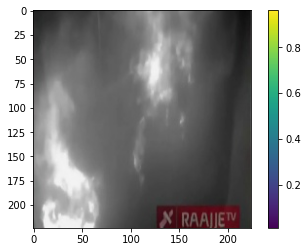

In [ ]:
%matplotlib inline
plt.figure()
plt.imshow(trainX[1]/255)
plt.colorbar()
plt.grid(False)
plt.show()

## Data generator

In [ ]:
class_names=[ "non_fire","fire_smoke"]

In [ ]:
if shuffle: #data augumentation
  data_gen = ImageDataGenerator(
      rescale = 1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      rotation_range=10,
      zoom_range=0.15,
      shear_range=0.15,
      fill_mode="nearest"
  )


In [ ]:
 #the data is being called into model
  train_generator = data_gen.flow(
          trainX, 
          trainY, 
          batch_size=BATCH_SIZE,
          shuffle=True,
  )

In [ ]:
  val_generator = data_gen.flow(
          valX, 
          valY, 
          batch_size=BATCH_SIZE,
          shuffle=True,
  )

In [ ]:
# GEt data from directories
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
          test_pics,
          target_size=(IMG_HEIGHT, IMG_WIDTH),
          class_mode='binary',
          shuffle=True,
          classes=class_names)

Found 194 images belonging to 2 classes.


###Inspect a batch

In [ ]:
from math import ceil,sqrt
def show_batch(image_batch, label_batch, batch_size):
  grid = ceil(sqrt(batch_size))
  plt.figure(figsize=(20,20))
  fire=0
  non = 0
  for n in range(batch_size):
      ax = plt.subplot(grid, grid,n+1)
      plt.imshow(image_batch[n])
      if int(label_batch[n]) == 1:
        fire += 1
      elif int(label_batch[n]) == 0:
        non += 1 
      plt.title(class_names[int(label_batch[n])])
      plt.axis('off')
  print(f"fire = {fire}, Non_fire = {non}")

fire = 18, Non_fire = 14


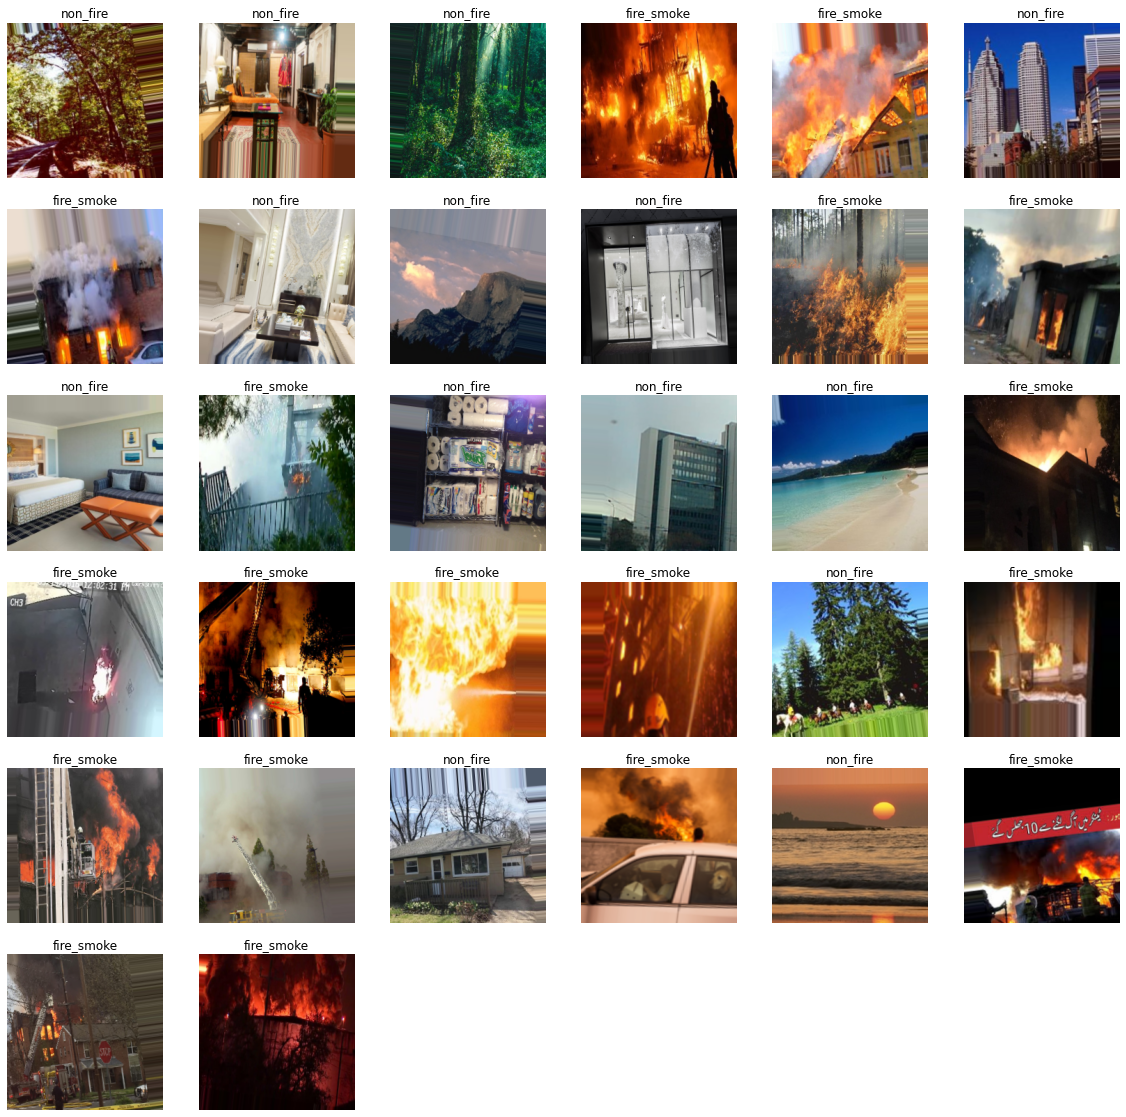

In [ ]:
image_batch, label_batch = next(train_generator)
show_batch(image_batch, label_batch, BATCH_SIZE)

fire = 16, Non_fire = 16


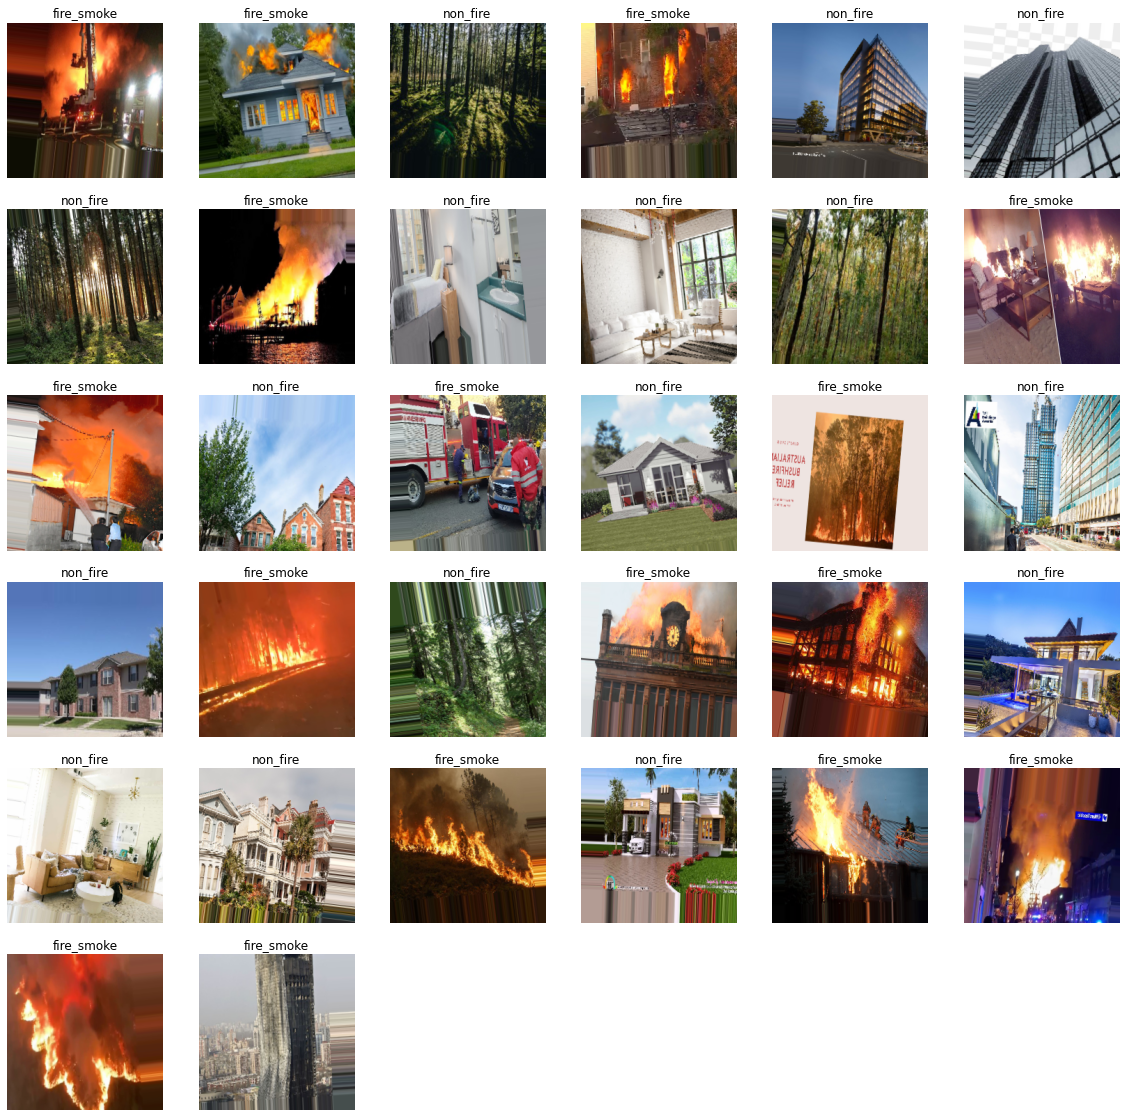

In [ ]:
image_batch, label_batch = next(val_generator)
show_batch(image_batch, label_batch, BATCH_SIZE)

#Modelling

#### Keras Pretrained Resnet 50


In [ ]:
from tensorflow.keras.applications import ResNet50V2
resnet_model = ResNet50V2(
    include_top=False, #Most important--last layer is not included
    weights="imagenet",
    input_tensor=None,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, DEPTH),
    pooling=None,
    classifier_activation=None,)
resnet_model.trainable = False# freeze the orignianl layers of the resnet model
rm=True

### Keras Pretrained NASNET Model

In [ ]:
from tensorflow.keras.applications import NASNetMobile
nasnet_model = NASNetMobile(
    include_top=False, #Most important--last layer is not included
    weights="imagenet",
    input_tensor=None,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, DEPTH),
    pooling='max',
)
nasnet_model.trainable = False
nm=True

### Keras Pretrained DenseNet Model

In [ ]:
from tensorflow.keras.applications import DenseNet121
densenet_model = DenseNet121(
    include_top=False, #Most important--last layer is not included
    weights="imagenet",
    input_tensor=None,
    input_shape=(IMG_HEIGHT, IMG_WIDTH, DEPTH),
    pooling='max')
densenet_model.trainable = False# freeze the orignianl layers of the resnet model
dm=True

29089792/29084464 [==============================] - 0s 0us/step


In [ ]:
#resnet_model.summary()
#nasnet_model.summary()
densenet_model.summary()

### Model  Classes

In [ ]:
class TransferLearning():
   def modelrn(self):
    X = resnet_model.layers[-1].output
    X = Flatten()(X)
    X = Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(
        l1=1e-5, l2=1e-4))(X)
    X = Dense(1,activation='sigmoid')(X)
    shorter_model = Model(resnet_model.inputs, outputs=X)
    return shorter_model
  def modelnn(self):
    X = nasnet_model.layers[-1].output
    X = Flatten()(X)
    X = Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(
        l1=1e-5, l2=1e-4))(X)
    X = Dense(1,activation='sigmoid')(X)
    shorter_model = Model(nasnet_model.inputs, outputs=X)
    return shorter_model
  def modeldn(self):
    X = densenet_model.layers[-1].output
    X = Flatten()(X)
    X = Dense(8, activation='relu', kernel_regularizer=regularizers.l1_l2(
        l1=1e-5, l2=1e-4))(X)
    X = Dense(1,activation='sigmoid')(X)
    shorter_model = Model(densenet_model.inputs, outputs=X)
    return shorter_model

# Compiling and Training

In [ ]:
my_model = TransferLearning()
my_model = my_model.modeldm()
my_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', 
                      save_best_only=True)
callback_list = []
callback_list.append(mc)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tb = TensorBoard(log_dir=log_dir, histogram_freq=1)
callback_list.append(tb)
#my_model.summary()

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
!rm -rf ./logs/   

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
EPOCHS = 10
history = my_model.fit(
    x=train_generator,
    validation_data = val_generator, 
    epochs = EPOCHS,
    callbacks= callback_list)

Epoch 1/10
248/248 [==============================] - 151s 611ms/step - loss: 0.2264 - accuracy: 0.9086 - val_loss: 0.1338 - val_accuracy: 0.9536
Epoch 2/10
248/248 [==============================] - 144s 580ms/step - loss: 0.1425 - accuracy: 0.9466 - val_loss: 0.1217 - val_accuracy: 0.9546
Epoch 3/10
248/248 [==============================] - 144s 580ms/step - loss: 0.1209 - accuracy: 0.9543 - val_loss: 0.0952 - val_accuracy: 0.9677
Epoch 4/10
248/248 [==============================] - 143s 578ms/step - loss: 0.1241 - accuracy: 0.9527 - val_loss: 0.1359 - val_accuracy: 0.9531
Epoch 5/10
248/248 [==============================] - 143s 578ms/step - loss: 0.1196 - accuracy: 0.9559 - val_loss: 0.0999 - val_accuracy: 0.9657
Epoch 6/10
248/248 [==============================] - 143s 577ms/step - loss: 0.1073 - accuracy: 0.9598 - val_loss: 0.0914 - val_accuracy: 0.9728
Epoch 7/10
248/248 [==============================] - 141s 569ms/step - loss: 0.1026 - accuracy: 0.9626 - val_loss: 0.1117 -

## Graphs about accuracy and loss

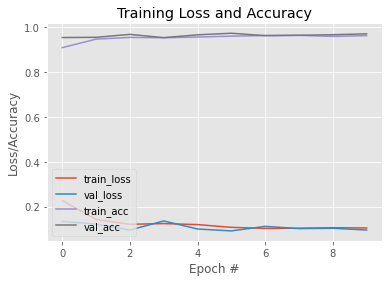

In [ ]:
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
fig = plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

#Evaluation

##### Saving weights file

In [ ]:
import shutil

wfd=os.path.join(base,'/content/drive/My Drive/weights/ismail')
name = 'densenet_train_%0.5f_val_%0.5f.h5' %(history.history["accuracy"][-1],history.history["val_accuracy"][-1])
#name= 'best_model.h5'
my_model.save(name, overwrite=True)
shutil.move(name,wfd)

'/content/drive/My Drive/weights/ismail/densenet_train_0.86276_val_0.95212.h5'

In [ ]:
tensorboard --logdir logs/fit

#####Loadiing Best Model from Drive

In [ ]:
model_path = "/content/drive/My Drive/weights/ismail/densenet_train_0.96244_\
val_0.96421.h5"
cpu_model = load_model(model_path)

#####Aqdas dataset

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
          '/content/drive/My Drive/datasets/mohsin_test_set',
          target_size=(IMG_HEIGHT, IMG_WIDTH),
          class_mode='binary',
          shuffle=True,
          classes=class_names)

Found 127 images belonging to 2 classes.


In [ ]:
cpu_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
cpu_model.evaluate(x = test_generator)

4/4 [==============================] - 46s 11s/step - loss: 0.3301 - accuracy: 0.8898


[0.3301090598106384, 0.8897637724876404]

#####base dataset

In [ ]:
!unzip /content/drive/My\ Drive/datasets/base_data1.zip
base_dataset = '/content/base_data1'
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
          base_dataset,
          target_size=(IMG_HEIGHT, IMG_WIDTH),
          class_mode='binary',
          shuffle=True,
          classes=class_names)

unzip:  cannot find or open /content/drive/My Drive/datasets/base_data1.zip, /content/drive/My Drive/datasets/base_data1.zip.zip or /content/drive/My Drive/datasets/base_data1.zip.ZIP.
Found 0 images belonging to 2 classes.


In [ ]:
my_model.evaluate(x=test_generator)

#####isamil testset TEST BLOCK

In [ ]:
i = 0
test_dirs = ['/content/drive/My Drive/datasets/Test', #Whole
             '/content/drive/My Drive/datasets/Test',
             '/content/drive/My Drive/datasets/Test',
             '/content/drive/My Drive/datasets/Test/fire_smoke/buildings',
             '/content/drive/My Drive/datasets/Test/fire_smoke/forest',
             '/content/drive/My Drive/datasets/Test/non_fire/department-inside',
             '/content/drive/My Drive/datasets/Test/non_fire/outside-buildings/\
             houses',
             '/content/drive/My Drive/datasets/Test/non_fire/outside-buildings/\
             tall-buildings',
             '/content/drive/My Drive/datasets/Test/non_fire/wild-forest',]

      
for sub in test_dirs:
  print(sub)
  i += 1
  if i == 2:
    classes = ['d','fire_smoke',]
  elif i == 3:
    classes = ['non_fire',]
  else:
    classes = class_names
  test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
      sub,
      target_size=(IMG_HEIGHT, IMG_WIDTH),
      class_mode='binary',
      shuffle=True,
      classes=classes)
  cpu_model.evaluate(x=test_generator)

/content/drive/My Drive/datasets/Test
Found 194 images belonging to 2 classes.
7/7 [==============================] - 52s 7s/step - loss: 0.1740 - accuracy: 0.9330
/content/drive/My Drive/datasets/Test
Found 96 images belonging to 2 classes.
3/3 [==============================] - 1s 495ms/step - loss: 0.1256 - accuracy: 0.9375
/content/drive/My Drive/datasets/Test
Found 98 images belonging to 1 classes.
4/4 [==============================] - 2s 563ms/step - loss: 0.2214 - accuracy: 0.9286
/content/drive/My Drive/datasets/Test/fire_smoke/buildings
Found 44 images belonging to 2 classes.
2/2 [==============================] - 2s 780ms/step - loss: 0.0433 - accuracy: 0.9773
/content/drive/My Drive/datasets/Test/fire_smoke/forest
Found 52 images belonging to 2 classes.
2/2 [==============================] - 2s 1s/step - loss: 0.1953 - accuracy: 0.9038
/content/drive/My Drive/datasets/Test/non_fire/department-inside
Found 10 images belonging to 2 classes.
1/1 [==============================

In [ ]:
i = 0
test_dirs = ['/content/drive/My Drive/datasets/Test', #Whole
             '/content/drive/My Drive/datasets/Test',
             '/content/drive/My Drive/datasets/Test',
             '/content/drive/My Drive/datasets/Test/fire_smoke/buildings',
             '/content/drive/My Drive/datasets/Test/fire_smoke/forest',
             '/content/drive/My Drive/datasets/Test/non_fire/department-inside',
             '/content/drive/My Drive/datasets/Test/non_fire/outside-buildings/houses',
             '/content/drive/My Drive/datasets/Test/non_fire/outside-buildings/\
             tall-buildings',
             '/content/drive/My Drive/datasets/Test/non_fire/wild-forest',]

model_path = '/content/drive/My Drive/weights/mohsin/nasnet_train_\
0.962820291519165_val_0.9637904763221741.h5'
#model_path ='/content/best_model.h5'
cpu_model = TransferLearning().my_densnet_model()
cpu_model.load_weights(model_path)
cpu_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
      
for sub in test_dirs:
  print(sub)
  i += 1
  if i == 2:
    classes = ['d','fire_smoke',]
  elif i == 3:
    classes = ['non_fire',]
  else:
    classes = class_names
  test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
      sub,
      target_size=(IMG_HEIGHT, IMG_WIDTH),
      class_mode='binary',
      shuffle=True,
      classes=classes)
  cpu_model.evaluate(x=test_generator)

In [ ]:
'''from math import ceil,sqrt
import matplotlib
def plot_entire_data(generator):
  i=0
  steps = ceil(generator.n / generator.batch_size)
  for step in range(0,steps):
    image_batch, label_batch = next(generator)
    GRID = ceil(sqrt(generator.batch_size))
    THRESHOLD = 0.5
    plt.figure(figsize=(10,10))
    for n in range(generator.batch_size):
        ax = plt.subplot(GRID, GRID,n+1)
        if int(labels[i]) == 0:
          if (predictions[i]) < THRESHOLD:
            plt.xlabel("Non-Fire True", color='green')
          else:
            plt.xlabel("Non-Fire False", color='red')
        elif int(labels[i]) == 1:
          if (predictions[i]) >= THRESHOLD:
            plt.xlabel("Fire True", color='green')
          else:
            plt.xlabel("Fire False", color='red')
  print(i)
plot_entire_data(test_generator)
'''

In [ ]:
import matplotlib.pyplot as plt
from math import ceil,sqrt

def plot_predictions(images, labels, predictions):
  GRID = ceil(sqrt(images.shape[0]))
  THRESHOLD = 0.5
  plt.figure(figsize=(10,10))
  for i in range(images.shape[0]):
    plt.subplot(GRID,GRID,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])
    if int(labels[i]) == 0:
      if (predictions[i]) < THRESHOLD:
        plt.xlabel("Non-Fire True", color='green')
      else:
        plt.xlabel("Non-Fire False", color='red')
    elif int(labels[i]) == 1:
      if (predictions[i]) >= THRESHOLD:
        plt.xlabel("Fire True", color='green')
      else:
        plt.xlabel("Fire False", color='red')
  plt.show()

##Test From Saved Weights

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
          #'/content/drive/My Drive/datasets/Test/non_fire/department-inside',
          '/content/drive/My Drive/datasets/Test', #whole
          #'/content/drive/My Drive/datasets/Test/non_fire/outside-buildings/houses',
          #'/content/drive/My Drive/datasets/Test/non_fire/outside-buildings/tall-buildings',
          #'/content/drive/My Drive/datasets/Test/non_fire/wild-forest',
          target_size=(IMG_HEIGHT, IMG_WIDTH),
          class_mode='binary',
          shuffle=True,
          classes=class_names)

Found 194 images belonging to 2 classes.


In [ ]:
#cpu_model = my_model
cpu_model.evaluate(x=test_generator)

7/7 [==============================] - 5s 669ms/step - loss: 0.1740 - accuracy: 0.9330


[0.17399811744689941, 0.9329897165298462]

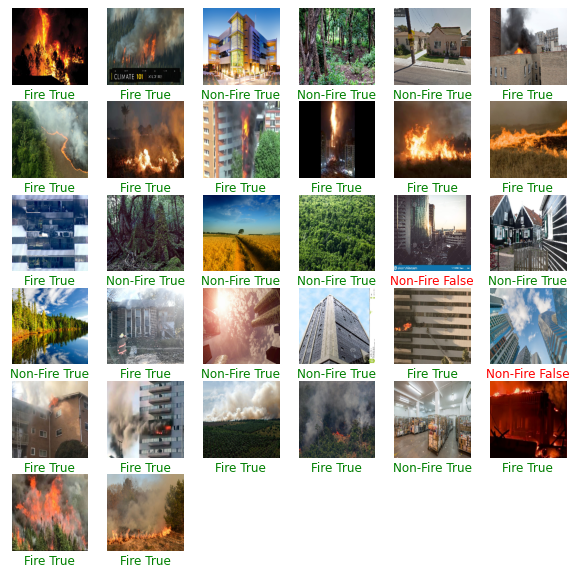

In [ ]:
image_batch, label_batch = next(test_generator)
plot_predictions(image_batch,label_batch,cpu_model.predict(image_batch))

In [ ]:
image_batch, label_batch = next(test_generator)
predictions = []
for i in cpu_model.predict(image_batch):
	if i[0] >0.5:
		predictions.append(1.0)
	
	else:
		predictions.append(0.0)
print(classification_report(label_batch,predictions, target_names= class_names))

              precision    recall  f1-score   support

    non_fire       0.93      1.00      0.97        14
  fire_smoke       1.00      0.94      0.97        18

    accuracy                           0.97        32
   macro avg       0.97      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



##Download Model

In [ ]:
from google.colab import files
files.download("./best_model.h5")